In [1]:
import numpy as np

from scipy.special import gammaln

import matplotlib.pyplot as plt

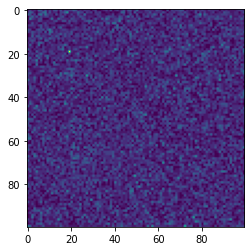

In [2]:
data = np.loadtxt('sparse_photon_image.dat')

plt.imshow(data)
plt.show()

In [3]:
def loglikelihood(data, strength, alpha, beta, background):
    """
    Implementing eqyation (v) from example 6.7 in the notes;
    log P(data|, s, alpha, beta, b).
    """
    h = np.array([[0.05, 0.1, 0.05], [0.4, 0.4, 0.1], [0.05, 0.1, 0.05]])
    
    Model = background * np.ones_like(data)
    Model[alpha-1:alpha+2, beta-1:beta+2] += strength * h
    
    log_like = np.sum( -Model + data*np.log(Model) - gammaln(data+1) )
    
    return log_like

Loop over the pixels. For each pixel maximise the likelihood over $s$. Record the overall maximum likelihoood value and the parameters at which this is achieved.

In [4]:
from scipy.optimize import minimize_scalar

background = 2

source_s = 0
source_a, source_b = 0, 0
max_logL = -np.inf

pixels = np.arange(1, len(data)-1)

for a in pixels:
    for b in pixels:
        
        sol = minimize_scalar(lambda s: -loglikelihood(data, s, a, b, background), 
                        bounds=(1, 20), method='Bounded')
        
        logL = -sol.fun
        strength = sol.x
        
        if logL > max_logL:
            max_logL = logL
            source_a, source_b = a, b
            source_s = strength
            
print("source with s =", strength, " at (alpha, beta) =", source_a, source_b)
print("LogLikelihood =", max_logL)

source with s = 2.3482677032826684  at (alpha, beta) = 19 19
LogLikelihood = -17045.685129966998
